In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
f = r.TFile("./data/gm2offline_ana.root")
f.cd("farline/evw_calo1")
f.ls()

TFile**		./data/gm2offline_ana.root	
 TFile*		./data/gm2offline_ana.root	
  TDirectoryFile*		farline	farline (ReconComparisonEastVsWest) folder
   TDirectoryFile*		evw_calo1	evw_calo1
    KEY: TH2I	evwDeltaXDeltaY;1	DeltaX vs. DeltaY in Calo 1
    KEY: TH2I	evwEnergyEvW;1	EnergyEast vs. EnergyWest in Calo 1
    KEY: TH1F	evwDeltaT;1	DeltaT in Calo 1
    KEY: TH1F	evwDeltaT_LowEnergy;1	DeltaT in Calo 1
    KEY: TH2I	evwEnergyWestdeltaT;1	deltaT [Corrected] vs. EnergyWest in Calo 1
    KEY: TH2I	EnergyVsTime_WestOnly_Calo_1;1	Energy vs. Time for Recon West Only Clusters in Calo 1
    KEY: TH2I	EnergyVsTime_EastOnly_Calo_1;1	Energy vs. Time for Recon East Only Clusters in Calo 1
   KEY: TDirectoryFile	evw_calo1;1	evw_calo1
   KEY: TDirectoryFile	evw_calo2;1	evw_calo2
   KEY: TDirectoryFile	evw_calo3;1	evw_calo3
   KEY: TDirectoryFile	evw_calo4;1	evw_calo4
   KEY: TDirectoryFile	evw_calo5;1	evw_calo5
   KEY: TDirectoryFile	evw_calo6;1	evw_calo6
   KEY: TDirectoryFile	evw_calo7;1	evw_calo7


In [3]:
t = f.Get("farline/evwTree")
t.Print()

******************************************************************************
*Tree    :evwTree   : evwTree                                                *
*Entries :    18505 : Total =         8368282 bytes  File  Size =    3490295 *
*        :          : Tree compression factor =   2.40                       *
******************************************************************************
*Br    0 :runNum    : runNum/i                                               *
*Entries :    18505 : Total  Size=      74737 bytes  File Size  =        702 *
*Baskets :        3 : Basket Size=      32000 bytes  Compression= 105.77     *
*............................................................................*
*Br    1 :subRunNum : subRunNum/i                                            *
*Entries :    18505 : Total  Size=      74758 bytes  File Size  =        708 *
*Baskets :        3 : Basket Size=      32000 bytes  Compression= 104.88     *
*...................................................

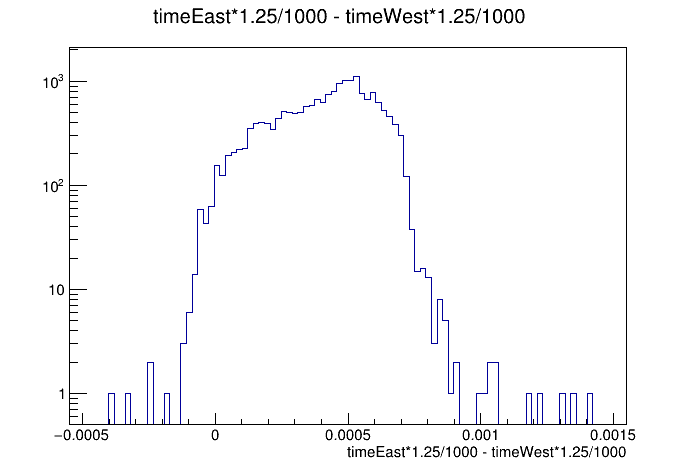

In [4]:
c = r.TCanvas()
t.Draw("timeEast*1.25/1000 - timeWest*1.25/1000")
c.SetLogy()
c.Draw()

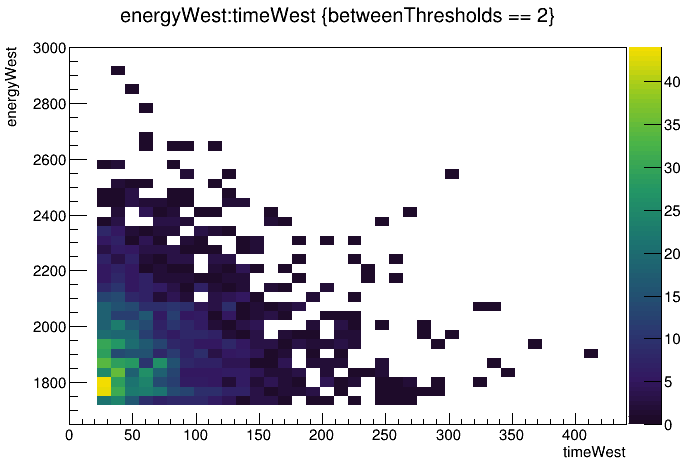

In [5]:
c = r.TCanvas()
t.Draw("energyWest:timeWest","betweenThresholds == 2","colz")
#c.SetLogy()
c.Draw()

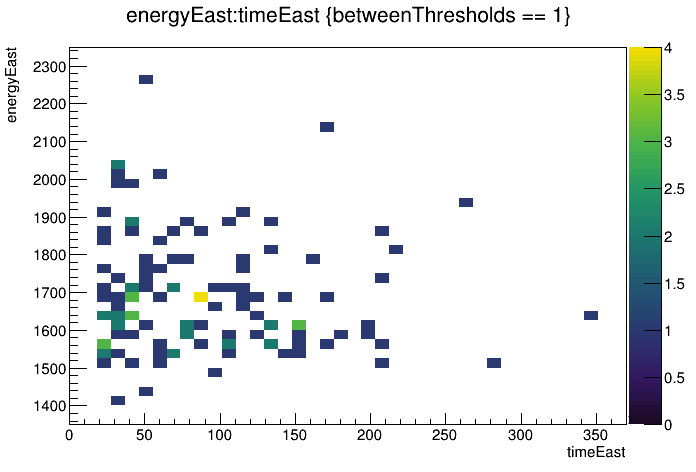

In [6]:
c = r.TCanvas()
t.Draw("energyEast:timeEast","betweenThresholds == 1","colz")
#c.SetLogy()
c.Draw()

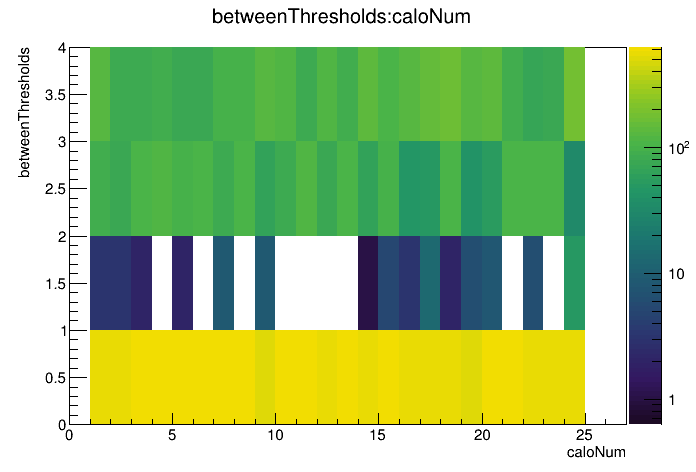

In [14]:
c = r.TCanvas()
t.Draw("betweenThresholds:caloNum","","colz")
c.SetLogz()
c.Draw()

In [10]:
calo = 24
hwest = f.Get("farline/evw_calo"+str(calo)+"/EnergyVsTime_WestOnly_Calo_"+str(calo)).Clone("ewest")
heast = f.Get("farline/evw_calo"+str(calo)+"/EnergyVsTime_EastOnly_Calo_"+str(calo)).Clone("eeast")

hwest.SetDirectory(0)
heast.SetDirectory(0)

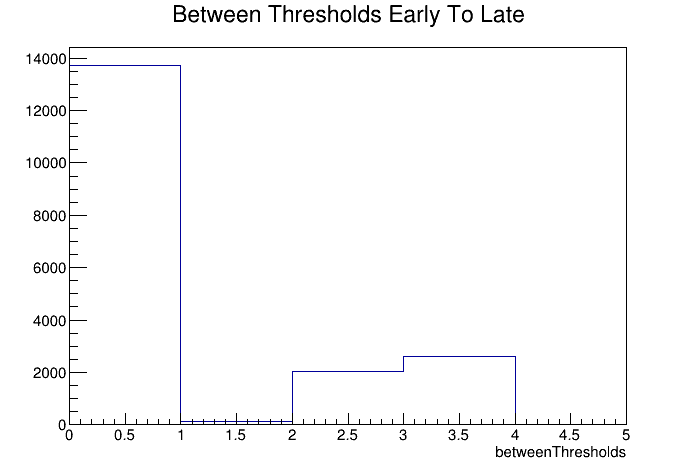

In [11]:
hThresh = f.Get("farline/evwbetweenThresholdsEarlyToLate").Clone()
c = r.TCanvas()
hThresh.ProjectionY().Draw()
#c.SetLogy()
c.Draw()

31.0
50.0


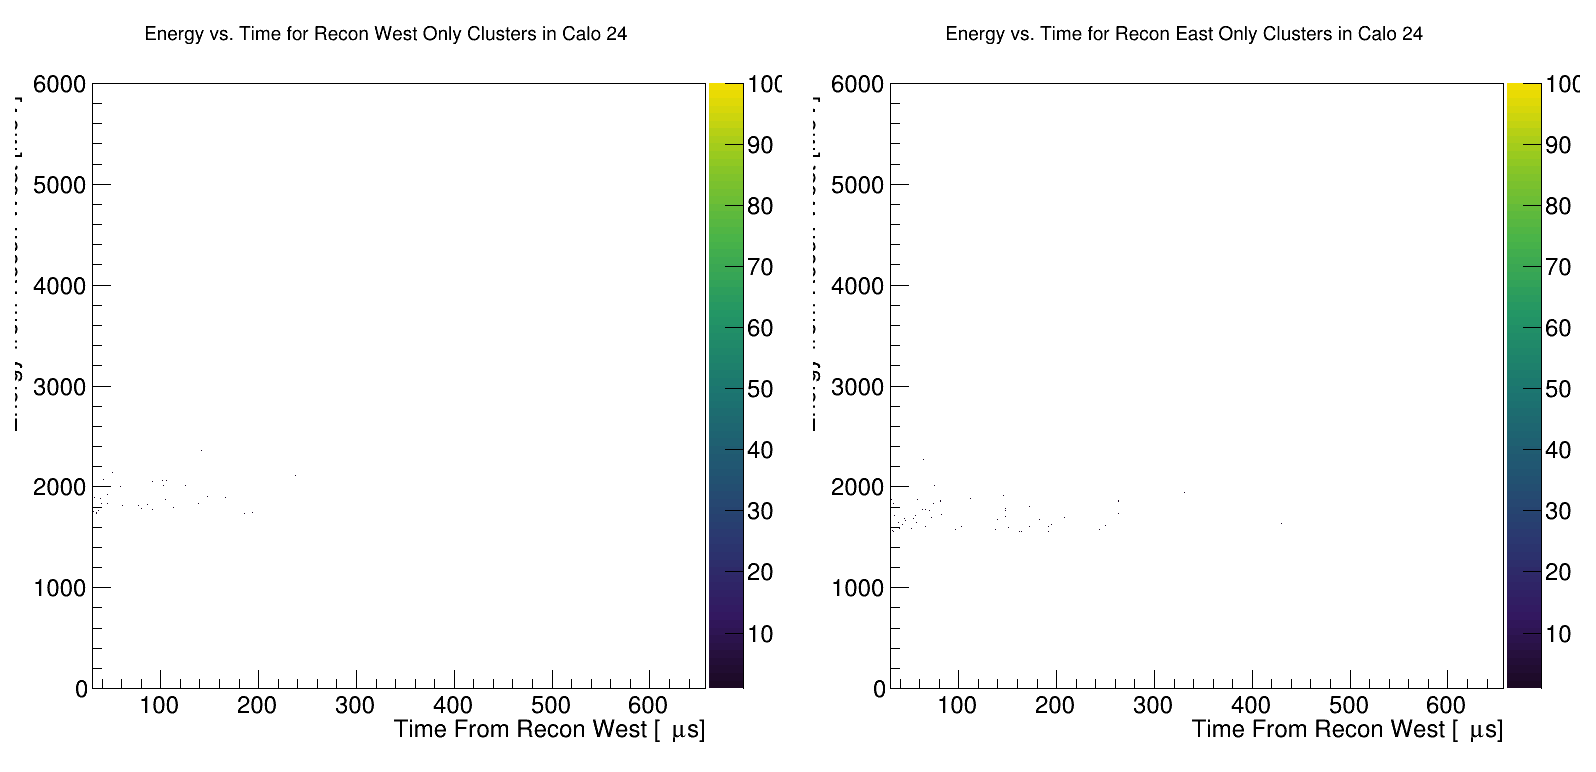

In [12]:
c = r.TCanvas("c","c",1600,800)
c.Divide(2)

c.cd(1)
hwest.Draw("colz")
hwest.GetZaxis().SetRangeUser(0.9,100)
print(hwest.GetEntries())

c.cd(2)
heast.Draw("colz")
heast.GetZaxis().SetRangeUser(0.9,100)
print(heast.GetEntries())

c.Draw()